In [26]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [28]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df)

In [30]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(normalized_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
normalized_df['coinid'] = market_data_df.index

# Set the coinid column as index
normalized_df.set_index('coinid', inplace=True)

# Display sample data
normalized_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [31]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
  kmeans_model = KMeans(n_clusters=k, n_init=10)
  kmeans_model.fit(normalized_df)
  inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

# Display the DataFrame
elbow_curve_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.836588
6,7,44.917412
7,8,36.934807
8,9,32.928252
9,10,28.222899


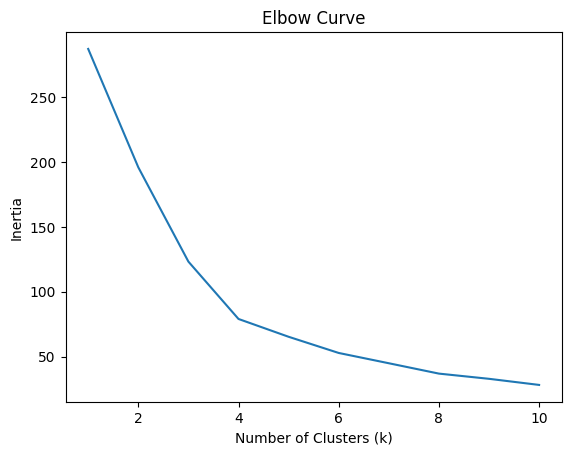

In [32]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], linestyle='-')
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer: 4**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [33]:
# Initialize the K-Means model using the best value for k
kmeans_final_model = KMeans(n_clusters=4, n_init=10)

In [34]:
# Fit the K-Means model using the scaled data
kmeans_final_model.fit(normalized_df)

KMeans(n_clusters=4, n_init=10)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_cluster_labels = kmeans_final_model.labels_

# View the resulting array of cluster values.
predicted_cluster_labels

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 2, 2],
      dtype=int32)

In [36]:
# Create a copy of the DataFrame
normalized_df_copy = normalized_df.copy()

In [37]:
# Add a new column to the DataFrame with the predicted clusters
normalized_df_copy['Cluster'] = predicted_cluster_labels

# Display sample data
normalized_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


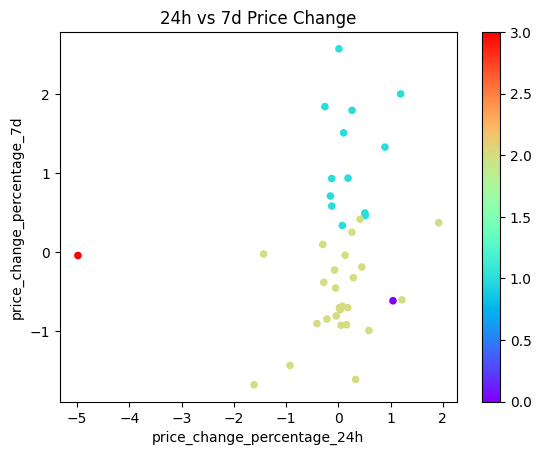

In [38]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.


normalized_df_copy.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=normalized_df_copy['Cluster'],
    colormap="rainbow",
    title="24h vs 7d Price Change"
)

plt.show()

### Optimize Clusters with Principal Component Analysis.

In [39]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [40]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform(normalized_df)

# View the first five rows of the DataFrame.
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [41]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.895**

In [42]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
pca_df['coinid'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coinid', inplace=True)

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [43]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1, 11)

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
  kmeans_model_pca = KMeans(n_clusters=k, n_init=10)
  kmeans_model_pca.fit(pca_df)
  inertia_values_pca.append(kmeans_model_pca.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data_pca = {"k": k_values_pca, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df_pca = pd.DataFrame(elbow_curve_data_pca)

# Display the DataFrame
elbow_curve_df_pca

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.720626
6,7,21.145312
7,8,17.091637
8,9,13.739407
9,10,10.484890


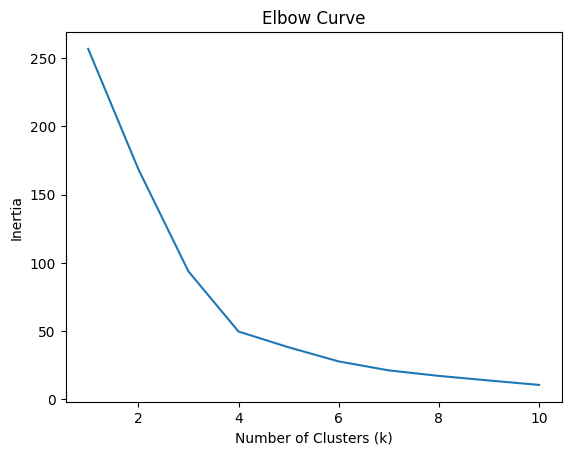

In [44]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_curve_df_pca['k'], elbow_curve_df_pca['inertia'], linestyle='-')
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [45]:
# Initialize the K-Means model using the best value for k
kmeans_final_model_pca = KMeans(n_clusters=4, n_init=10)

In [46]:
# Fit the K-Means model using the PCA data
kmeans_final_model_pca.fit(pca_df)

KMeans(n_clusters=4, n_init=10)

In [47]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_cluster_labels_pca = kmeans_final_model_pca.labels_

# Print the resulting array of cluster values.
predicted_cluster_labels_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [48]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['crypto_cluster'] = predicted_cluster_labels_pca

# Display sample data
pca_df_copy.head()

,PCA1,PCA2,PCA3,crypto_cluster
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


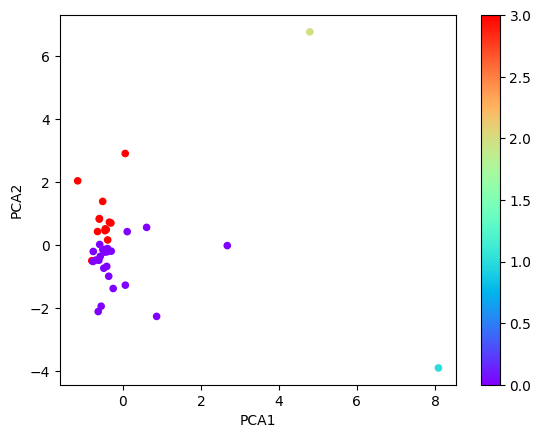

In [49]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.

pca_df_copy.plot.scatter(
    x="PCA1",
    y="PCA2",
    c=pca_df_copy['crypto_cluster'],
    colormap="rainbow"
)

plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Use the columns from the original scaled DataFrame as the index.
loadings = pca_model.components_[2]
weights = [abs(i) for i in loadings]
weights = [i / sum(weights) for i in weights]

print("Loadings:")
for i in range(0, len(market_data_df.columns)):
  print(market_data_df.columns[i] + ": " + str(loadings[i]))
print()
print("Weights:")
for i in range(0, len(market_data_df.columns)):
  print(market_data_df.columns[i] + ": " + str(weights[i]))

Loadings:
price_change_percentage_24h: -0.2187949249185465
price_change_percentage_7d: 0.7876703041045972
price_change_percentage_14d: 0.3495335590004386
price_change_percentage_30d: -0.18174374022976078
price_change_percentage_60d: -0.3613770722056302
price_change_percentage_200d: 0.03973324689775204
price_change_percentage_1y: 0.21054134429249993

Weights:
price_change_percentage_24h: 0.10179376392129619
price_change_percentage_7d: 0.3664615393327268
price_change_percentage_14d: 0.16261956990413298
price_change_percentage_30d: 0.08455579759909429
price_change_percentage_60d: 0.16812973330329248
price_change_percentage_200d: 0.018485788717640856
price_change_percentage_1y: 0.09795380722181632


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:** Strongest positive influence and strongest influence in general is demonstrated by price_change_percentage_7d. Strongest negative influence is demonstrated by price_change_percentage_60d
    